In [1]:
#Import code from last time
%run k2-2.ipynb

         Current function value: 0.165427
         Iterations: 100
         Function evaluations: 110
         Gradient evaluations: 110


<Figure size 640x480 with 1 Axes>

         Current function value: 0.095548
         Iterations: 100
         Function evaluations: 117
         Gradient evaluations: 117


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.58322864, 0.48171501],
       [0.48171501, 0.44281211],
       [0.44281211, 0.49627058],
       [0.49627058, 0.47546339],
       [0.47546339, 0.55155979],
       [0.55155979, 0.50099435],
       [0.50099435, 0.44545859],
       [0.44545859, 0.50571167],
       [0.50571167, 0.46588904],
       [0.46588904, 0.46785659],
       [0.46785659, 0.45300142],
       [0.45300142, 0.43741172],
       [0.43741172, 0.3506737 ]])

In [3]:
testY

array([[0.44281211],
       [0.49627058],
       [0.47546339],
       [0.55155979],
       [0.50099435],
       [0.44545859],
       [0.50571167],
       [0.46588904],
       [0.46785659],
       [0.45300142],
       [0.43741172],
       [0.3506737 ],
       [0.36403131]])

In [4]:
trainX

array([[0.        , 0.051925  ],
       [0.051925  , 0.14831904],
       [0.14831904, 0.11211342],
       [0.11211342, 0.17073406],
       [0.17073406, 0.2232566 ],
       [0.2232566 , 0.24197469],
       [0.24197469, 0.36573346],
       [0.36573346, 0.55255899],
       [0.55255899, 0.37002352],
       [0.37002352, 0.3325317 ],
       [0.3325317 , 0.38788752],
       [0.38788752, 0.39836394],
       [0.39836394, 0.2848263 ],
       [0.2848263 , 0.18673502],
       [0.18673502, 0.18269477],
       [0.18269477, 0.255617  ],
       [0.255617  , 0.23597043],
       [0.23597043, 0.16413413],
       [0.16413413, 0.17817663],
       [0.17817663, 0.1639561 ],
       [0.1639561 , 0.13324148],
       [0.13324148, 0.22639902],
       [0.22639902, 0.25501386],
       [0.25501386, 0.23708614],
       [0.23708614, 0.23165112],
       [0.23165112, 0.23306761],
       [0.23306761, 0.22117372],
       [0.22117372, 0.22633168],
       [0.22633168, 0.21869864],
       [0.21869864, 0.2320322 ],
       [0.

In [5]:
trainY

array([[0.14831904],
       [0.11211342],
       [0.17073406],
       [0.2232566 ],
       [0.24197469],
       [0.36573346],
       [0.55255899],
       [0.37002352],
       [0.3325317 ],
       [0.38788752],
       [0.39836394],
       [0.2848263 ],
       [0.18673502],
       [0.18269477],
       [0.255617  ],
       [0.23597043],
       [0.16413413],
       [0.17817663],
       [0.1639561 ],
       [0.13324148],
       [0.22639902],
       [0.25501386],
       [0.23708614],
       [0.23165112],
       [0.23306761],
       [0.22117372],
       [0.22633168],
       [0.21869864],
       [0.2320322 ],
       [0.23194795],
       [0.22154782],
       [0.28795858],
       [0.28837327],
       [0.29714576],
       [0.24366982],
       [0.30743731],
       [0.35859786],
       [0.37218122],
       [0.45025948],
       [0.44309563],
       [0.55815598],
       [0.60235983],
       [0.69629172],
       [0.79060467],
       [0.64402223],
       [0.58322864],
       [0.48171501]])

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 2
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

1.3844972850521276e-10

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.005915
         Iterations: 48
         Function evaluations: 52
         Gradient evaluations: 52


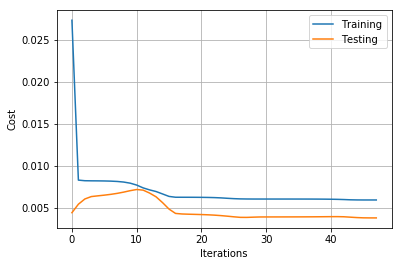

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.02729724]),
 array([0.00827751]),
 array([0.00820519]),
 array([0.00819346]),
 array([0.00818785]),
 array([0.00817724]),
 array([0.00815698]),
 array([0.00811843]),
 array([0.00804609]),
 array([0.0079143]),
 array([0.00768803]),
 array([0.00735251]),
 array([0.00711333]),
 array([0.00691851]),
 array([0.00662981]),
 array([0.00633818]),
 array([0.00624026]),
 array([0.00623837]),
 array([0.00623664]),
 array([0.00623345]),
 array([0.0062275]),
 array([0.00621655]),
 array([0.00619699]),
 array([0.00616414]),
 array([0.00611529]),
 array([0.00607243]),
 array([0.00604397]),
 array([0.00603261]),
 array([0.0060272]),
 array([0.00602628]),
 array([0.00602623]),
 array([0.00602618]),
 array([0.00602609]),
 array([0.00602592]),
 array([0.0060256]),
 array([0.00602502]),
 array([0.00602394]),
 array([0.00602201]),
 array([0.00601863]),
 array([0.00601298]),
 array([0.00600385]),
 array([0.00598917]),
 array([0.00596597]),
 array([0.00593541]),
 array([0.00592034]),
 array([0.0059

In [17]:
T.testJ

[array([0.00440066]),
 array([0.00541056]),
 array([0.0060348]),
 array([0.00632031]),
 array([0.00640625]),
 array([0.0064887]),
 array([0.00658368]),
 array([0.00670206]),
 array([0.00685068]),
 array([0.00702197]),
 array([0.00716011]),
 array([0.00708578]),
 array([0.00673537]),
 array([0.00628696]),
 array([0.00559654]),
 array([0.00482853]),
 array([0.00431519]),
 array([0.00424881]),
 array([0.00422204]),
 array([0.00420164]),
 array([0.00417959]),
 array([0.0041508]),
 array([0.00411046]),
 array([0.00405551]),
 array([0.00398703]),
 array([0.00391234]),
 array([0.00384737]),
 array([0.00384234]),
 array([0.00386961]),
 array([0.00389242]),
 array([0.00389546]),
 array([0.00389711]),
 array([0.00389856]),
 array([0.00390005]),
 array([0.00390181]),
 array([0.00390405]),
 array([0.00390705]),
 array([0.00391113]),
 array([0.00391665]),
 array([0.00392366]),
 array([0.00393068]),
 array([0.00393233]),
 array([0.00391757]),
 array([0.00386875]),
 array([0.00382116]),
 array([0.003

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.0022885903840438016

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.13650079],
       [0.18675397],
       [0.19922226],
       [0.2137009 ],
       [0.2541274 ],
       [0.27776232],
       [0.33274767],
       [0.41387675],
       [0.40091127],
       [0.35232943],
       [0.3622849 ],
       [0.37749494],
       [0.3423825 ],
       [0.27216839],
       [0.24118498],
       [0.2717036 ],
       [0.28462499],
       [0.24781839],
       [0.23243458],
       [0.23042189],
       [0.21283926],
       [0.2442782 ],
       [0.28421315],
       [0.28492156],
       [0.27739999],
       [0.27641462],
       [0.27173183],
       [0.27044558],
       [0.26867886],
       [0.27216811],
       [0.27604756],
       [0.2715629 ],
       [0.29659111],
       [0.31515068],
       [0.31870619],
       [0.29968444],
       [0.31066752],
       [0.34645443],
       [0.36299544],
       [0.38936333],
       [0.40163532],
       [0.42622536],
       [0.44711985],
       [0.46250939],
       [0.47603225],
       [0.46981072],
       [0.45261192],
       [0.430

In [21]:
y

array([[0.14831904],
       [0.11211342],
       [0.17073406],
       [0.2232566 ],
       [0.24197469],
       [0.36573346],
       [0.55255899],
       [0.37002352],
       [0.3325317 ],
       [0.38788752],
       [0.39836394],
       [0.2848263 ],
       [0.18673502],
       [0.18269477],
       [0.255617  ],
       [0.23597043],
       [0.16413413],
       [0.17817663],
       [0.1639561 ],
       [0.13324148],
       [0.22639902],
       [0.25501386],
       [0.23708614],
       [0.23165112],
       [0.23306761],
       [0.22117372],
       [0.22633168],
       [0.21869864],
       [0.2320322 ],
       [0.23194795],
       [0.22154782],
       [0.28795858],
       [0.28837327],
       [0.29714576],
       [0.24366982],
       [0.30743731],
       [0.35859786],
       [0.37218122],
       [0.45025948],
       [0.44309563],
       [0.55815598],
       [0.60235983],
       [0.69629172],
       [0.79060467],
       [0.64402223],
       [0.58322864],
       [0.48171501],
       [0.442

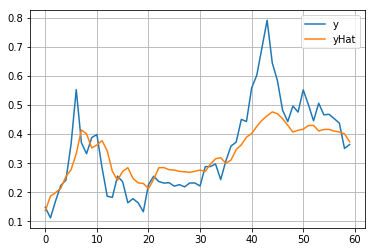

In [22]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [23]:
prediksi=NN.forward(dataprediksi)

In [24]:
prediksi

array([[0.35851007],
       [0.45510142],
       [0.48915244],
       [0.48326643]])

In [25]:
from sklearn.metrics import mean_squared_error 

In [26]:
Y_true= ([	0.795380412	]	,
[	1	]	,
[	0.707681705	]	,
[	0.491695324	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.1338990615446287

In [27]:
dataprediksi

array([[0.3506737 , 0.36403131],
       [0.36403131, 0.79538041],
       [0.79538041, 1.        ],
       [1.        , 0.70768171]])

In [28]:
a=np.array([	0.707681705	,	0.491695324	])

In [29]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.44596256])

In [30]:
#prediksi 2
c=prediksi
b=a[1:]
d=np.concatenate((b,c))
prediksi=NN.forward(d)
prediksi

array([0.4092561])

In [31]:
#prediksi 3
c=prediksi
b=d[1:]
e=np.concatenate((b,c))
prediksi=NN.forward(e)
prediksi

array([0.39200679])

In [32]:
#prediksi 4
c=prediksi
b=e[1:]
f=np.concatenate((b,c))
prediksi=NN.forward(f)
prediksi

array([0.37996873])

In [33]:
#prediksi 5
c=prediksi
b=f[1:]
g=np.concatenate((b,c))
prediksi=NN.forward(g)
prediksi

array([0.37275144])

In [34]:
#prediksi 6
c=prediksi
b=g[1:]
h=np.concatenate((b,c))
prediksi=NN.forward(h)
prediksi

array([0.36790072])

In [35]:
#prediksi 7
c=prediksi
b=g[1:]
i=np.concatenate((b,c))
prediksi=NN.forward(i)
prediksi

array([0.36635239])

In [36]:
#prediksi 8
c=prediksi
b=g[1:]
j=np.concatenate((b,c))
prediksi=NN.forward(j)
prediksi

array([0.36585538])

In [37]:
#prediksi 9
c=prediksi
b=g[1:]
k=np.concatenate((b,c))
prediksi=NN.forward(k)
prediksi

array([0.36569555])

In [38]:
#prediksi 10
c=prediksi
b=g[1:]
l=np.concatenate((b,c))
prediksi=NN.forward(l)
prediksi

array([0.36564412])

In [39]:
#prediksi 11
c=prediksi
b=g[1:]
m=np.concatenate((b,c))
prediksi=NN.forward(m)
prediksi

array([0.36562757])

In [40]:
#prediksi 12
c=prediksi
b=g[1:]
n=np.concatenate((b,c))
prediksi=NN.forward(n)
prediksi

array([0.36562225])